# problem 1

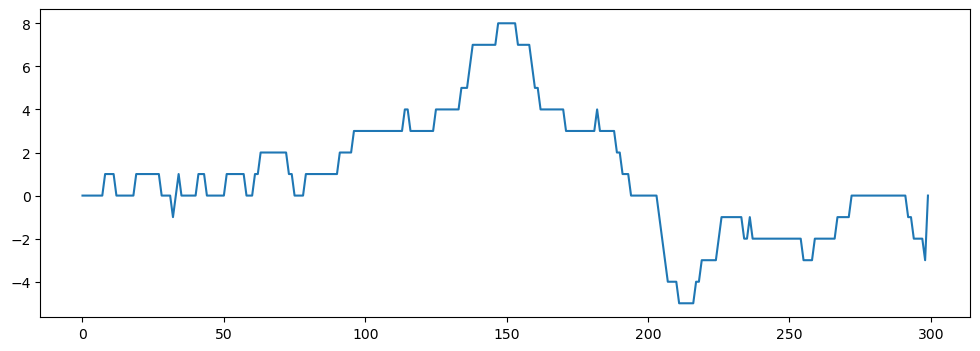

In [1]:
using Random
# set a seed so we get the same output every time
seed = 393845
Random.seed!(seed)
# initialize the vector of speeds
val = 0; u = zeros(300); u[1] = val
# set a density that determines how often the speed changes # low density corresponds to infrequent speed changes
dens = 0.1
# build speed vector for all times between now and time 299 
for i in 2:299
    # if a uniform(0,1) variable is < density
    if rand() < dens
        # increase the speed by 1 mph
        val = val + 1
        u[i] = val
        # if a uniform(0,1) variable is >= 1 - density
    elseif rand() >= 1.0-dens
        # decrease the speed by 1 mph 
        val = val - 1
        u[i] = val
    else# otherwise the speed stays the same 
        u[i] = val
    end 
end
# the final speed must be 0
u[300] = 0
# T = 300
T = length(u)
# plot the speeds (your figure should match the one in the assignment!) 

using PyPlot
figure(figsize=(12,4))
plot(u,"-");

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...


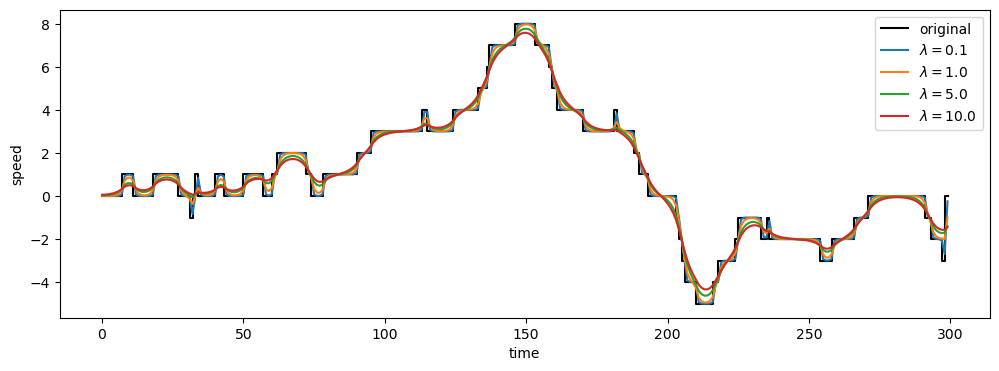

  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [2]:
import Pkg
Pkg.add("Gurobi")
T = 300
# try a variety of different regularization weights
lambdavals = [0.1, 1, 5, 10]
k = length(lambdavals)
y = zeros(T,k)


using JuMP, Gurobi
for (i,lambda) = enumerate(lambdavals)
    m = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m,"OutputFlag",false)
    
    @variable(m, optv[1:T])
    
    @expression(m, LS, sum((u[i] - optv[i])^2 for i = 1:T))
    @expression(m, Rsmooth, sum((optv[i+1] - optv[i])^2 for i = 1:T-1))
    
    @objective(m, Min, LS + lambda*Rsmooth)
    
    optimize!(m)
    y[:,i] = value.(optv)
end

using PyPlot
figure(figsize=(12,4))
step(u,"k-",label="original")
for (i,lambda) = enumerate(lambdavals)
    plot(y[:,i],label=string(L"\lambda = ", lambda))
end
legend(loc ="best")
ylabel("speed")
xlabel("time");

### Plot the Pareto Curve.

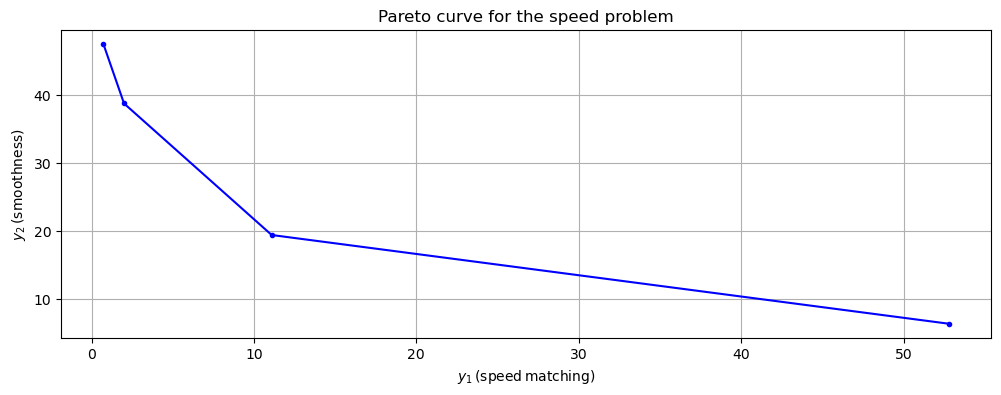

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 301 rows, 599 columns and 899 nonzeros
Model fingerprint: 0x6ef1afe0
Model has 599 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e+00]
  QObjective range [2e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 299 rows, 597 columns, 895 nonzeros
Presolved model has 597 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 597
 AA' NZ     : 2.980e+02
 Factor NZ  : 4.890e+03
 Factor Ops : 1.023e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.68200000e+02  2.68200000e+02  0.00e+00 3.20e+00  0.

In [3]:
# create a function that takes a value for λ then solves and reports solution of tradeoff problem
function solveOpt(x)
    m = Model(Gurobi.Optimizer)
    @variable(m, optv[1:T])
    @variable(m, dv[1:T-1])
    @constraint(m, optv[1]==0)
    @constraint(m, optv[T]==0)
    for i = 1:T-1
        @constraint(m, dv[i] == optv[i+1] - optv[i])
    end
    @objective(m, Min, sum(dv.^2) + x*sum((optv - u).^2))

    optimize!(m)
    y2 = value(sum(dv.^2))
    y1 = value(sum((optv - u).^2))
    opt = value.(optv)
    
    return (y1, y2, opt)
end

Npts = 4
y1 = zeros(Npts)
y2 = zeros(Npts)
for i in 1:4
    (y1[i],y2[i],x) = solveOpt(lambdavals[i])
end


# plot the points
using PyPlot
figure(figsize=(12,4))
plot( y1, y2, "b.-" )
xlabel(L"y_1\, (\sf speed\, matching)")
ylabel(L"y_2\, (\sf smoothness)");
title("Pareto curve for the speed problem")
grid()

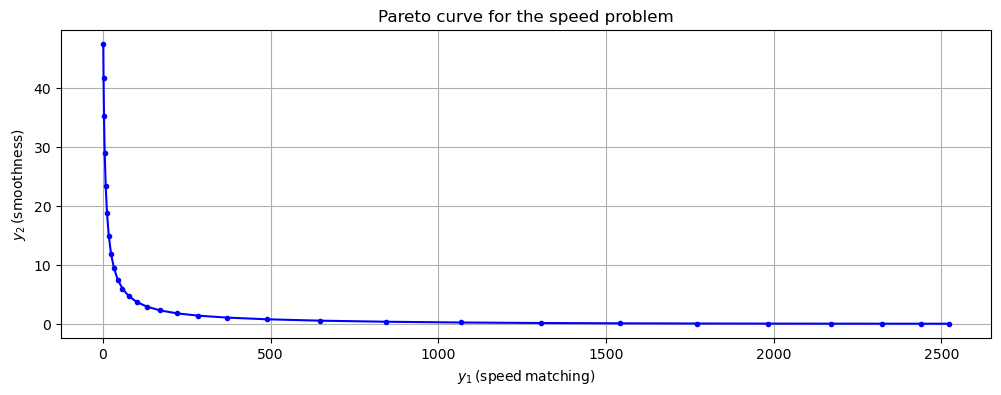

[1.0e-5, 1.610262027560939e-5, 2.592943797404667e-5, 4.1753189365604006e-5, 6.723357536499335e-5, 0.00010826367338740541, 0.00017433288221999874, 0.0002807216203941176, 0.00045203536563602454, 0.0007278953843983154, 0.0011721022975334804, 0.0018873918221350976, 0.0030391953823131978, 0.004893900918477494, 0.007880462815669913, 0.01268961003167922, 0.020433597178569417, 0.03290344562312668, 0.05298316906283707, 0.0853167852417281, 0.1373823795883263, 0.2212216291070449, 0.3562247890262442, 0.5736152510448679, 0.9236708571873862, 1.4873521072935114, 2.3950266199874855, 3.856620421163471, 6.2101694189156165, 10.0]
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 301 rows, 599 columns and 899 nonzeros
Model fingerprint: 0xe05e8954
Model has 599 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-05, 2e-04]
  QObject

In [4]:
Npts = 30
y1 = zeros(Npts)
y2 = zeros(Npts)

println(10 .^(range(-5,stop=1,length=Npts)))
for (i,λ) in enumerate(10 .^(range(-5,stop=1,length=Npts)))
    (y1[i],y2[i],uu) = solveOpt(λ)
end;

# plot the points
using PyPlot
figure(figsize=(12,4))
plot( y1, y2, "b.-" )
xlabel(L"y_1\, (\sf speed\, matching)")
ylabel(L"y_2\, (\sf smoothness)");
title("Pareto curve for the speed problem")
grid()

# problem 2

## (a)&(b)


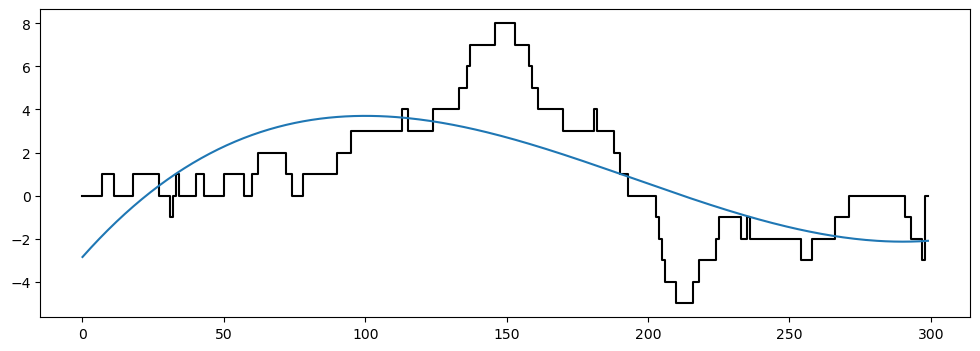

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14e00d650>

In [5]:
# order of polynomial to use
k = 3

# fit using a function of the form f(x) = p x^k + q x^(k-1) + ... + rk x + s
# our matrix A will need to have m rows, where m is the number of data points
m = 300
# initialize A to be a matrix of zeros with m rows and k+1 columns
# (there will be coefficients on x^3, x^2, x^1, and x^0, so 4 columns)
A = zeros(m,k+1)


for i = 1:m
    for j = 1:k+1
        A[i,j] = i^(k+1-j)
    end
end

coef = [1.7e-6, -0.001, 0.15, -3]
y_poly= A*coef

using PyPlot
figure(figsize=(12,4))
step(u,"k-",label="original")
plot(y_poly,label=string(L"y_poly"))

The coefficient is $[1.7e-6, -0.001, 0.15, -3]$.

## (c)

In [6]:
using LinearAlgebra
# calculate the 2-norm error
println("2-normerror:", norm(u-y_poly))

2-normerror:36.88763139118808


In a broad sense, the polynomial technique fits the speed sequence worse than the regularization method, but its smoothness is better.